# CognoRise InfoTech

# Task 3 - Iris Flower Prediction

# By Sajal Srivastava

# Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Connecting with data
df2 = pd.read_csv("IRIS.csv")

In [4]:
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# first 5 rows of the dataset
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# last 5 rows of the dataset
df2.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
# dataset information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Statistical measures of the dataset
df2.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Checking the number of missing values in each column
df2.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df2['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Data Visualization

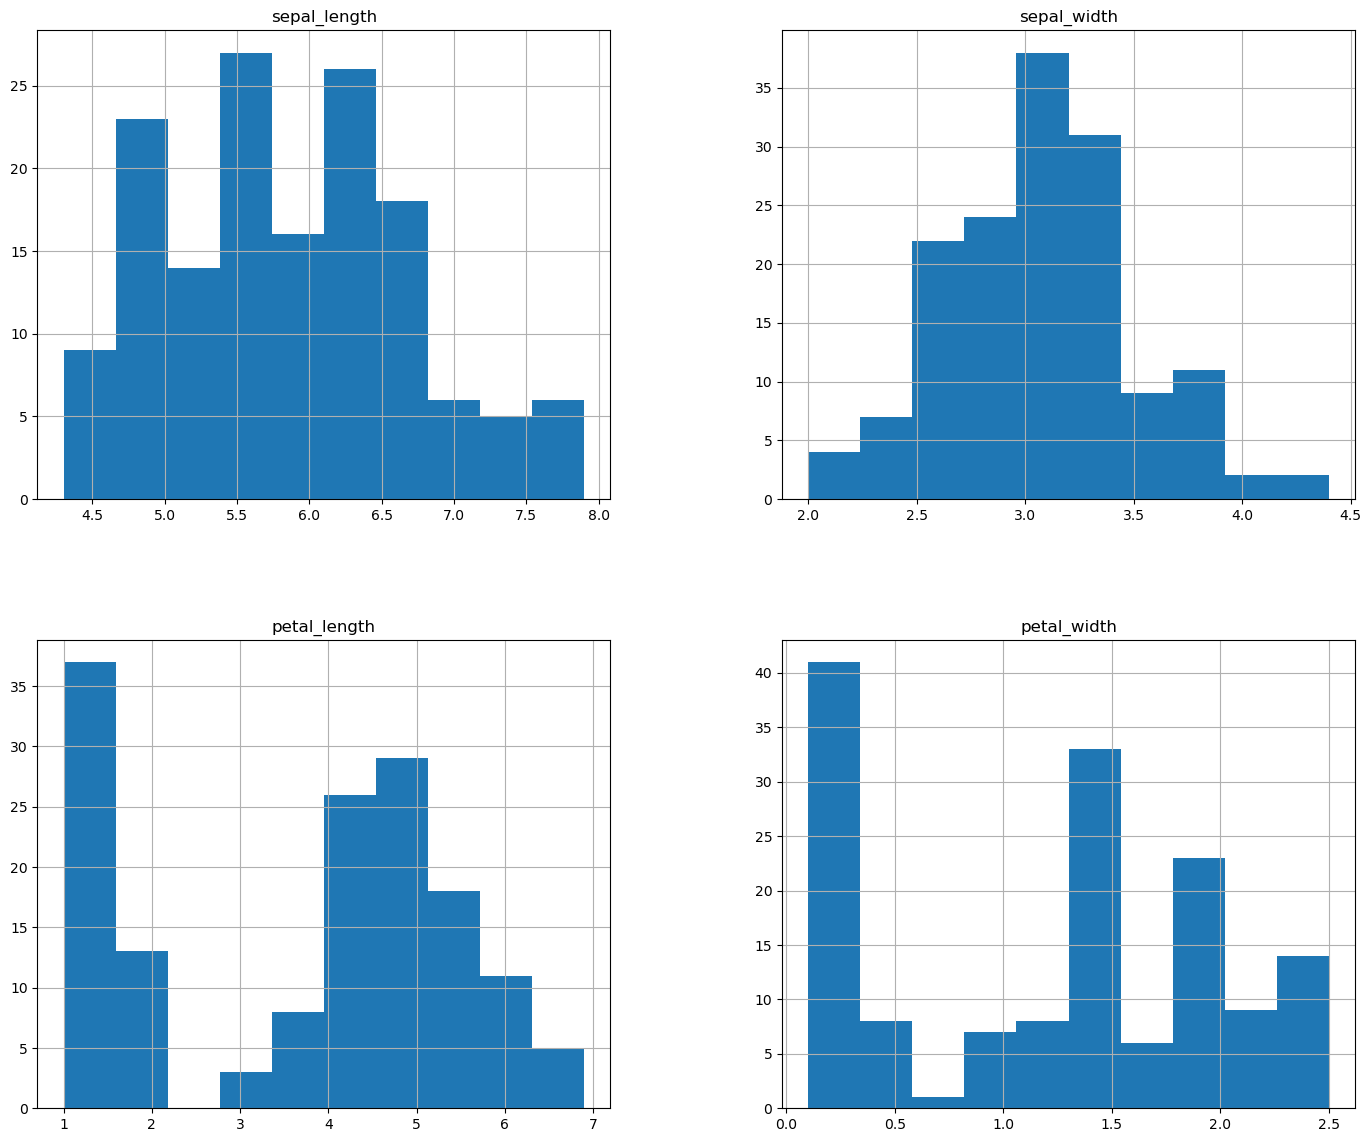

In [11]:
# Plotting the data distribution plots
df2.hist(figsize=(17,14))
plt.show()

<Axes: xlabel='species', ylabel='count'>

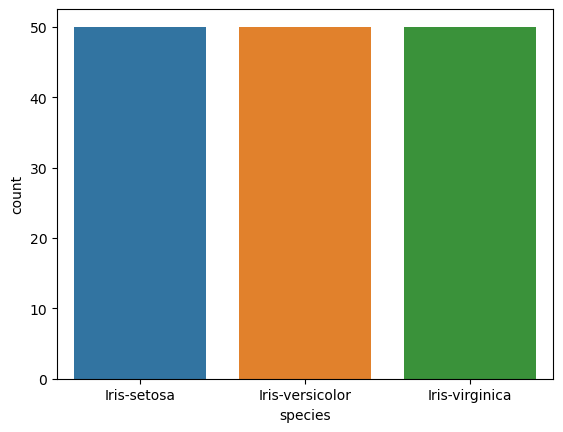

In [12]:
sns.countplot( x = 'species' , data = df2)

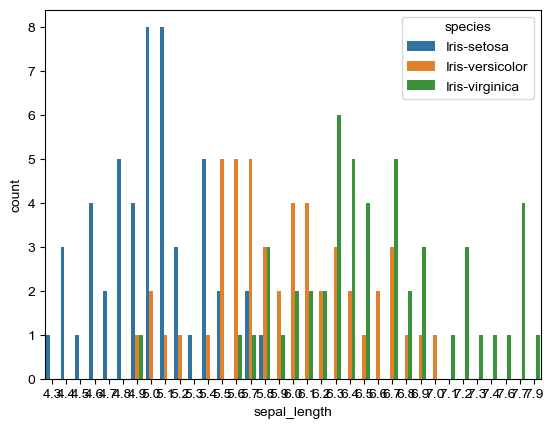

In [13]:
# Distribution of sepal_length w.r.t species
sns.countplot(x = 'sepal_length',hue = 'species',data = df2)
sns.set(rc={'figure.figsize':(8,15)})

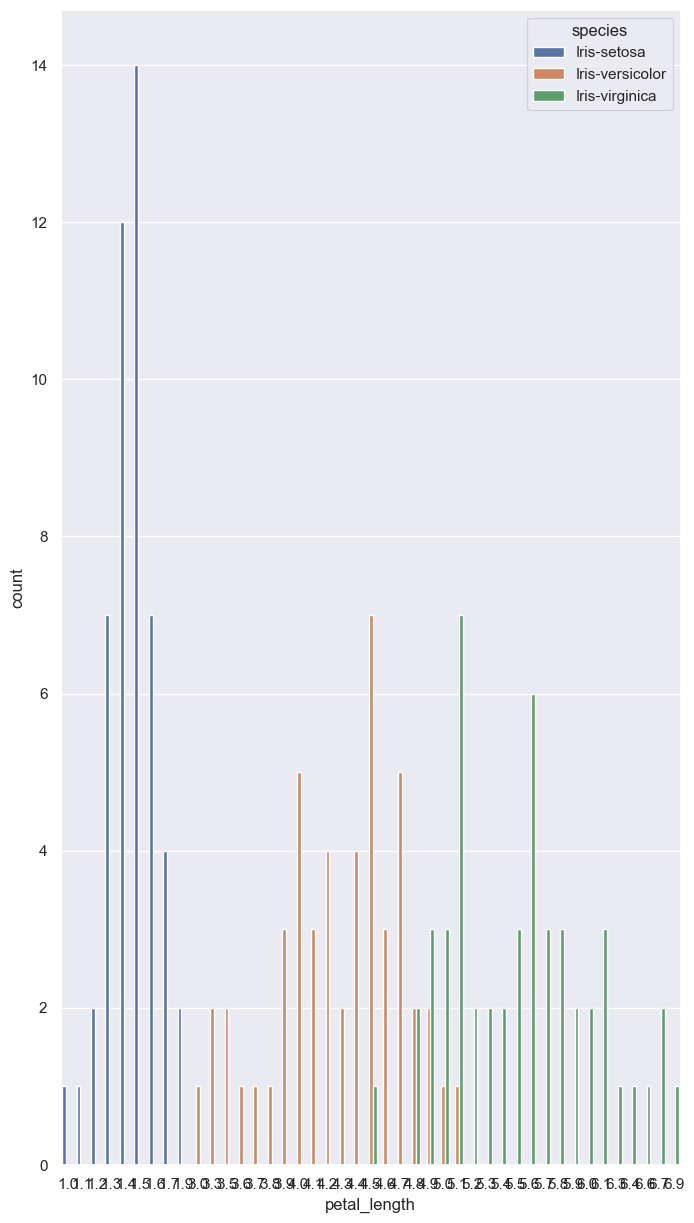

In [14]:
# Distribution of petal_length w.r.t species
sns.countplot(x = 'petal_length',hue = 'species',data = df2)
sns.set(rc={'figure.figsize':(12,12)})

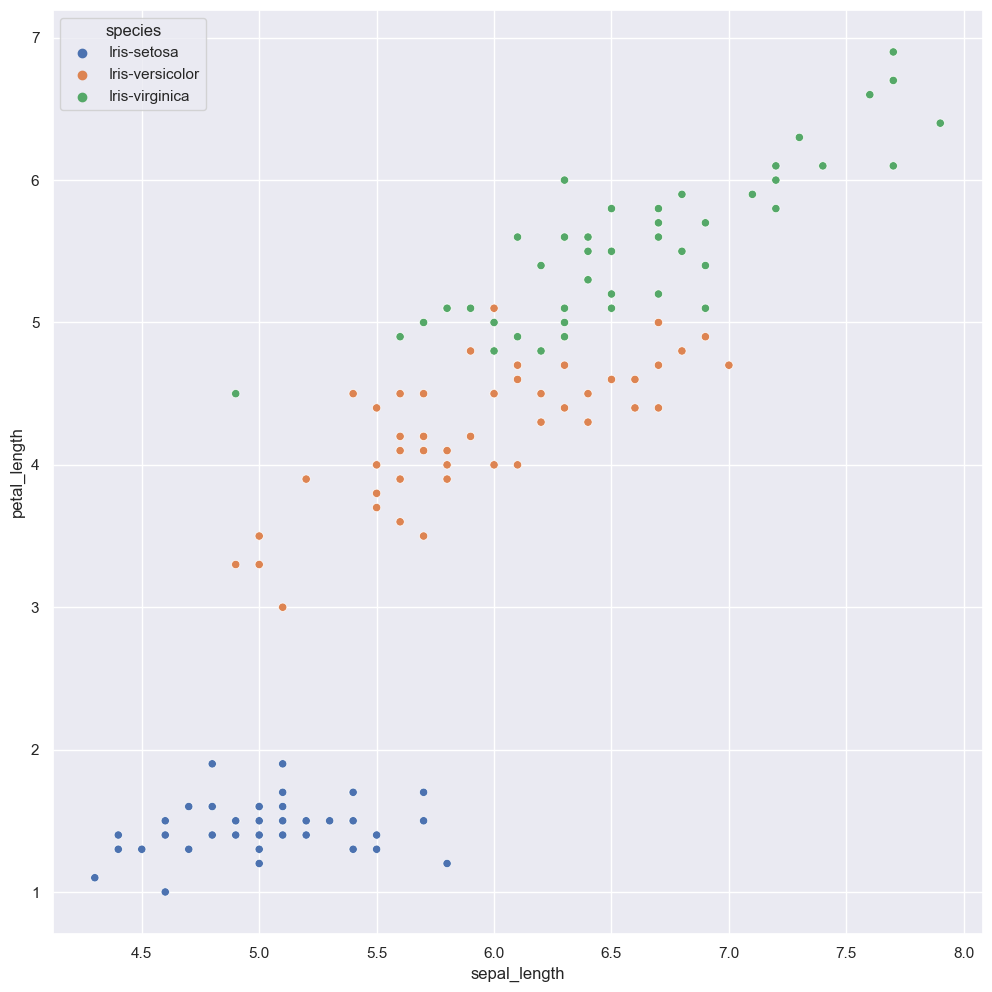

In [15]:
# Scatter Plot
sns.scatterplot(x = 'sepal_length', y = 'petal_length', hue = 'species',data = df2)
sns.set(rc={'figure.figsize':(5,7)})

In [16]:
# mean of each column by species
df2.groupby(by= 'species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


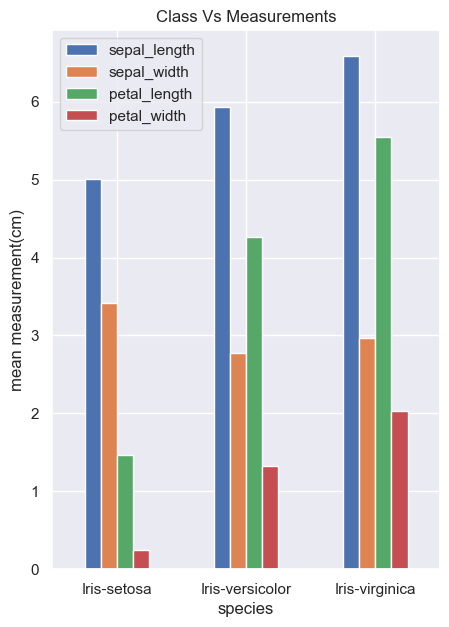

In [17]:
# plot for mean of each feature for each label class
df2.groupby(by ="species").mean().plot(kind="bar")
plt.title('Class Vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0)
plt.grid(True)
sns.set(rc={'figure.figsize':(7,5)})

In [18]:
# Label Encoder
le = LabelEncoder()
df2['species'] = le.fit_transform(df2['species'])
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
# Correlation Matrix
df2.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

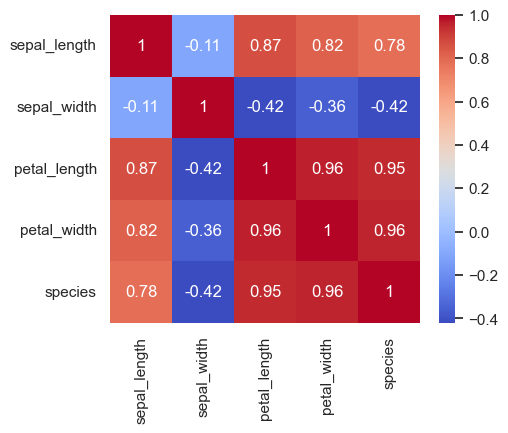

In [20]:
corr = df2.corr()
fig,ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

# Seperating Features and Target

In [21]:
X = df2.drop(columns = ['species'])
Y = df2['species']

In [22]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [23]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


# Splitting the data into training data & test data # 

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(150, 4) (120, 4) (30, 4)


# Model Training

In [26]:
model = LogisticRegression

In [27]:
# training the Logistic Regression model with training data
log = LogisticRegression(random_state = 2)
log.fit(X_train,Y_train)

LogisticRegression(random_state=2)

# Model Prediction

In [28]:
pred = print(log.predict(X_test))

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]


In [29]:
print(Y_test)

6      0
3      0
113    2
12     0
24     0
129    2
25     0
108    2
128    2
45     0
48     0
42     0
35     0
5      0
85     1
54     1
41     0
96     1
144    2
89     1
77     1
74     1
115    2
94     1
87     1
29     0
2      0
127    2
44     0
125    2
Name: species, dtype: int32


# Thank you !